# Full Moon Theatre Planning

This notebook is designed to help planning Full Moon Theatre events.

We start by importing the required external Python libraries.

In [118]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylunar
import geopy
from geopy.geocoders import Nominatim
from datetime import datetime, timedelta
from os.path import join
import math
from moon.jupyter_ui import JupyterUi

We then select a location, the starting and ending dates for the Full Moon Theatre workshop and the target moment for the performance event.

The location should be indicated with the syntax "Location name, Country Code", for instance "Montpellier, FR".

In [119]:
# LOCATION_NAME = "Montpellier, FR"
LOCATION_NAME = "Hooke Park, UK"
# LOCATION_NAME = "La Grange, Causse de la Selle, FR"
# LOCATION_NAME = "Théâtre de Verdure, Pl. des Aires, 13500 Martigues"
# LOCATION_NAME = "Saint-Roman-de-Codières, Occitanie"

We use the Nominatim service to derive the latitude and longitude of the selected location.

In [120]:
geolocator = Nominatim(user_agent="full_moon")
location = geolocator.geocode(LOCATION_NAME)
print("Address:", location.address)
print("Latitude:", location.latitude)
print("Longitude:", location.longitude)

Address: Hooke Park, Hooke, North Poorton, Dorset, England, United Kingdom
Latitude: 50.790707850000004
Longitude: -2.6816552948061627


We then define the following function to help converting decimal degrees to degrees, minutes and seconds. 
We must do this because the `pylunar` library uses this input format for latitude and longitude.

In [121]:
def deg_to_dms(deg):
    """Convert from decimal degrees to degrees, minutes, seconds."""
    m, s = divmod(abs(deg)*3600, 60)
    d, m = divmod(m, 60)
    if deg < 0:
        d = -d
    d, m = int(d), int(m)
    return d, m, s

In [122]:
latitude_dms = deg_to_dms(location.latitude)
longitude_dms = deg_to_dms(location.longitude)
print("Latitude (DMS):", latitude_dms)
print("Longitude (DMS):", longitude_dms)

Latitude (DMS): (50, 47, 26.548260000010487)
Longitude (DMS): (-2, 40, 53.959061302186456)


We can now use the `pylunar` library to identify the dates and times of the Full Moons over the next year.

In [123]:
moon_info = pylunar.MoonInfo(latitude_dms, longitude_dms)

now_year = int(datetime.strftime(datetime.now(),'%Y'))
now_month = int(datetime.strftime(datetime.now(),'%m'))
now_day = int(datetime.strftime(datetime.now(),'%d'))
# date initialisation
startDate = datetime(now_year, now_month, now_day)-timedelta(days=28)
endDate = datetime(now_year+1, now_month, now_day)
 
while startDate <= endDate:
    moon_info.update(startDate)
    time_to_full_moon = moon_info.time_to_full_moon()
    startDate += timedelta(days=int(time_to_full_moon+1))
    moon_info.update(startDate)
    full_moon = moon_info.next_four_phases()[3]
    full_moon_date = full_moon[1]
    day_of_the_week = datetime(full_moon[1][0], full_moon[1][1], full_moon[1][2]).strftime('%A')
    moon_info.update(datetime(full_moon[1][0], full_moon[1][1], full_moon[1][2], 23, 0))
    print(full_moon, day_of_the_week, "%d.2" % moon_info.azimuth(), "%d.2" % moon_info.altitude())
    


('full_moon', (2023, 8, 31, 1, 35, 33.888811)) Thursday 145.2 26.2
('full_moon', (2023, 9, 29, 9, 57, 29.345159)) Friday 150.2 39.2
('full_moon', (2023, 10, 28, 20, 24, 0.492493)) Saturday 156.2 51.2
('full_moon', (2023, 11, 27, 9, 16, 16.659315)) Monday 138.2 59.2
('full_moon', (2023, 12, 27, 0, 33, 10.338242)) Wednesday 123.2 56.2
('full_moon', (2024, 1, 25, 17, 53, 57.068241)) Thursday 136.2 55.2
('full_moon', (2024, 2, 24, 12, 30, 22.256625)) Saturday 142.2 43.2
('full_moon', (2024, 3, 25, 7, 0, 16.416796)) Monday 149.2 29.2
('full_moon', (2024, 4, 23, 23, 48, 55.940077)) Tuesday 162.2 22.2
('full_moon', (2024, 5, 23, 13, 53, 5.253559)) Thursday 160.2 10.2
('full_moon', (2024, 6, 22, 1, 7, 48.966103)) Saturday 152.2 5.2
('full_moon', (2024, 7, 21, 10, 17, 4.647682)) Sunday 153.2 11.2
('full_moon', (2024, 8, 19, 18, 25, 44.062308)) Monday 156.2 21.2
('full_moon', (2024, 9, 18, 2, 34, 24.104429)) Wednesday 144.2 36.2


We can now use the `pylunar` library to obtain information about the Moon position and conditions on the target date and time.

In [124]:
TARGET_MOMENT = (2023, 10, 28, 23, 0, 0) # format: (YEAR, MONTH, DAY, HOUR, MINUTES, SECONDS)
START_DAY = [2023, 10, 26] # format: [YEAR, MONTH, DAY]
END_DAY = [2023, 10, 28] # format: [YEAR, MONTH, DAY]

moon_info = pylunar.MoonInfo(latitude_dms, longitude_dms)
moon_info.update(TARGET_MOMENT)
print("Target Moon's azimuth:", moon_info.azimuth())
print("Target Moon's altitude:", moon_info.altitude())
print("Target Moon's age (days):", moon_info.age())
print("Target Moon's fractional phase:", moon_info.fractional_phase())
print("Target Moon's phase name:", moon_info.phase_name())
print("Target Moon's magnitude (measure of the brightness of a celestial object):", moon_info.magnitude())
print("Distance of target Moon's from Earth:", moon_info.earth_distance(), "km")
print("Next four Moon phases:", moon_info.next_four_phases())

Target Moon's azimuth: 156.55337260727157
Target Moon's altitude: 51.48679241644569
Target Moon's age (days): 14.211730042770796
Target Moon's fractional phase: 0.9997474211255863
Target Moon's phase name: WANING_GIBBOUS
Target Moon's magnitude (measure of the brightness of a celestial object): -12.72
Distance of target Moon's from Earth: 365075.8837129292 km
Next four Moon phases: [('last_quarter', (2023, 11, 5, 8, 36, 45.365642)), ('new_moon', (2023, 11, 13, 9, 27, 22.32332)), ('first_quarter', (2023, 11, 20, 10, 49, 50.355023)), ('full_moon', (2023, 11, 27, 9, 16, 16.659326))]


We can visualise the Moon's phase using the `moon` library

{'time': '28 Oct 2023 21:00 UT', 'phase': 99.99, 'age': 14.128, 'diameter': 1938.2, 'distance': 369790, 'j2000': {'ra': 2.1702, 'dec': 14.1622}, 'subsolar': {'lon': 4.099, 'lat': -0.321}, 'subearth': {'lon': 4.403, 'lat': -1.3}, 'posangle': 341.907}


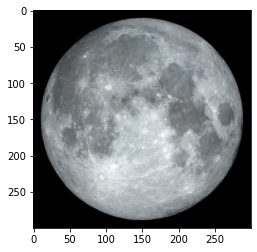

In [125]:
ui = JupyterUi(size=(300,300))
time_format = "%Y-%m-%d"
hour_format = "%H:%M"
target_date = datetime(TARGET_MOMENT[0], TARGET_MOMENT[1], TARGET_MOMENT[2]).strftime(time_format)
ui.set_moon_phase(date = target_date) #defaults to today's date
print(ui.moon_datetime_info)
ui.show()

With the following function we can convert the target Moon's position from spherical coordinates (azimuth and altitude) to orthogonal versors, that can be used in external tools like Rhino.

In [126]:
def spherical_to_versors(r, azimuth, altitude):
    x = r * math.sin(altitude) * math.cos(azimuth)
    y = - r * math.sin(altitude) * math.sin(azimuth)
    z = - r * math.cos(altitude)
    return x, y, z

In [127]:
spherical_to_versors(1, math.radians(moon_info.azimuth()), math.radians((moon_info.altitude() + 180) % 360))
# spherical_to_versors(1, math.radians(0), math.radians((45 + 180) % 360))

(0.7178574096738621, 0.31133847640330986, 0.6226950236570055)

Now we calculate the position of the Moon over the workshop days for every hour.

In [128]:
# moon_positions = []
moon_positions = pd.DataFrame(columns = ["year","month","day","hour","minutes","azimuth","altitude"])
for year in range(START_DAY[0], END_DAY[0]+1):
    for month in range(START_DAY[1], END_DAY[1]+1):
        for day in range(START_DAY[2], END_DAY[2]+1):
            for hour in range(0,24):
                for minutes in range(0,60+1,10):
                    moment = (year, month, day, hour, minutes, 0)
                    moon_info.update(moment)
                    if moon_info.altitude()>0:
                        moon_positions.loc[len(moon_positions)] = [year, month, day, hour, minutes, 
                                                               moon_info.azimuth(), moon_info.altitude()]
print(moon_positions)

       year  month   day  hour  minutes     azimuth   altitude
0    2023.0   10.0  26.0   0.0      0.0  220.728710  25.453315
1    2023.0   10.0  26.0   0.0     10.0  223.174068  24.469284
2    2023.0   10.0  26.0   0.0     20.0  225.575508  23.437828
3    2023.0   10.0  26.0   0.0     30.0  227.933699  22.361749
4    2023.0   10.0  26.0   0.0     40.0  230.249611  21.243821
..      ...    ...   ...   ...      ...         ...        ...
254  2023.0   10.0  28.0  23.0     20.0  164.029465  52.611192
255  2023.0   10.0  28.0  23.0     30.0  167.882430  53.027396
256  2023.0   10.0  28.0  23.0     40.0  171.794243  53.341380
257  2023.0   10.0  28.0  23.0     50.0  175.749100  53.550425
258  2023.0   10.0  28.0  23.0     60.0  179.729707  53.652717

[259 rows x 7 columns]


And finally we plot these positions in a polar diagram.

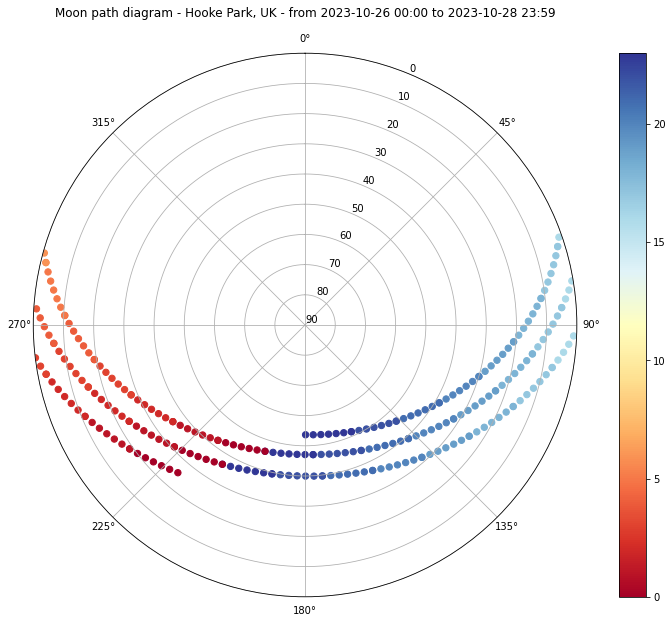

In [134]:
# moon_positions['azimuth_rad'] = moon_positions.apply(lambda row: row.azimuth*math.pi/180, axis=1)
# plt.polar(moon_positions['azimuth_rad'].values,moon_positions['altitude'].values)
# plt.show()

time_format = "%Y-%m-%d %H:%M"
start_time = datetime(START_DAY[0], START_DAY[1], START_DAY[2]).strftime(time_format)
end_time = datetime(END_DAY[0], END_DAY[1], END_DAY[2], 23, 59).strftime(time_format)

ax = plt.subplot(1, 1, 1, projection='polar')

cm = plt.cm.get_cmap('RdYlBu')

points = ax.scatter(np.radians(moon_positions['azimuth'].values), moon_positions['altitude'].values,
                    s=40, label="Hours", c=moon_positions['hour'].values, cmap=cm)

ax.figure.colorbar(points)
ax.set_theta_zero_location('N', offset=0)
ax.set_rlim(bottom=90, top=0)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlim(90, 0, 1)
# Note: you must set the end of arange to be slightly larger than 90 or it won't include 90
ax.set_yticks(np.arange(0, 91, 10))
# ax.set_yticklabels(ax.get_yticks()[::-1])
# ax.set_rmax(90)
# ax.set_rmin(0)

# plt.rcParams['figure.figsize'] = [15, 10]

ax.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')


plt.show()

We can now load the corrected fisheye image of the sky taken at the location with the top of the camera and image facing north. We flip the image horizontally (left to right) because we want to superimpose it to the moon path plot.

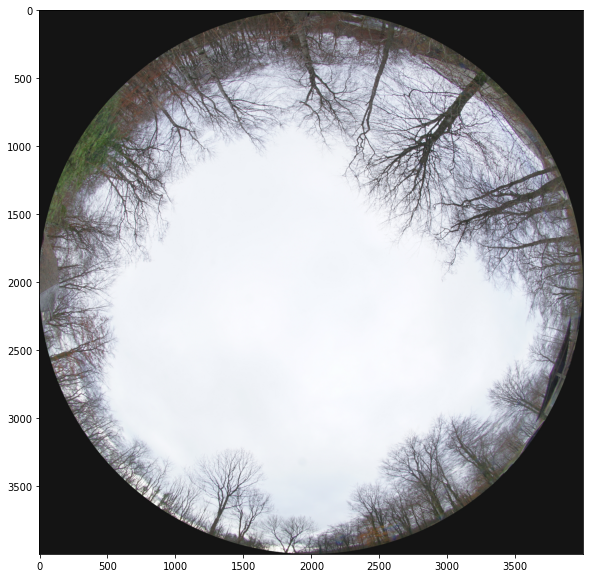

In [135]:
FISHEYE_PATH = join("img", "fmt-up_corrected.jpg")

fisheye = plt.imread(FISHEYE_PATH)
img = plt.imshow(np.fliplr(fisheye), origin='upper')
plt.show()

The next step is to superimpose the image to the plot.

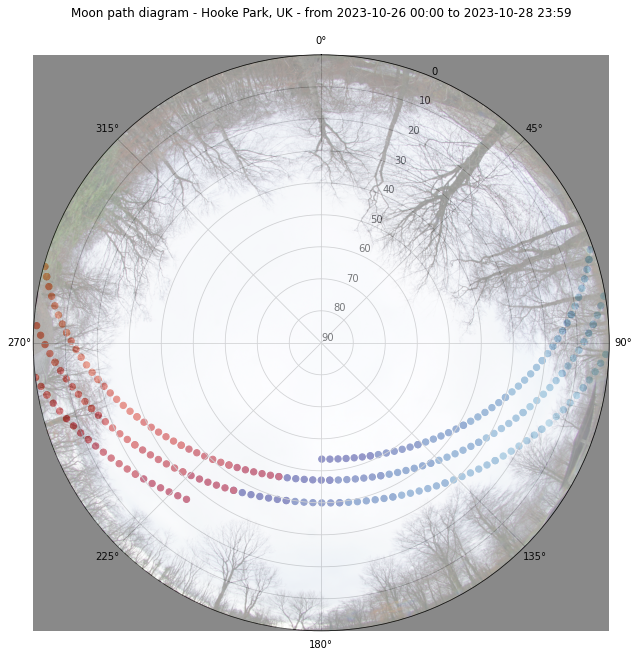

In [136]:
time_format = "%Y-%m-%d %H:%M"
start_time = datetime(START_DAY[0], START_DAY[1], START_DAY[2]).strftime(time_format)
end_time = datetime(END_DAY[0], END_DAY[1], END_DAY[2], 23, 59).strftime(time_format)

cm = plt.cm.get_cmap('RdYlBu')

fig = plt.gcf()
axes_coords = [0.1, 0.1, 0.8, 0.8]

ax_polar = fig.add_axes(axes_coords, projection = 'polar', label="ax polar")

ax_polar.patch.set_alpha(0)

points = ax_polar.scatter(np.radians(moon_positions['azimuth'].values), moon_positions['altitude'].values,
                    s=40, label="Hours", c=moon_positions['hour'].values, cmap=cm)

ax_polar.set_theta_zero_location('N', offset=0)
ax_polar.set_rlim(bottom=90, top=0)
# ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)
# ax_polar.set_rlim(90, 0, 1)
# Note: you must set the end of arange to be slightly larger than 90 or it won't include 90
# ax_polar.set_yticks(np.arange(0, 91, 10))
# ax_polar.set_yticklabels(ax.get_yticks()[::-1])
ax.set_rmax(0)
ax.set_rmin(90)
# ax_polar.axis('on')

ax_image = fig.add_axes(axes_coords, label="ax image")
ax_image.imshow(np.fliplr(fisheye), origin='upper', alpha = .5, extent=None)
ax_image.axis('off')  # don't show the axes ticks/lines/etc. associated with the image

# ax.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')
ax_polar.set_title("Moon path diagram - %s - from %s to %s" %(LOCATION_NAME, start_time, end_time), va='bottom')


plt.show()